In [2]:
%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./dataset_for_assignment2.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  5000 non-null   int64 
 1   Gender                   5000 non-null   object
 2   Age                      5000 non-null   int64 
 3   Activity Level           5000 non-null   object
 4   Location                 5000 non-null   object
 5   App Sessions             5000 non-null   int64 
 6   Distance Travelled (km)  5000 non-null   int64 
 7   Calories Burned          5000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 254.0+ KB


In [5]:
# data checking, to check for missing values
df.isnull().sum()

User ID                    0
Gender                     0
Age                        0
Activity Level             0
Location                   0
App Sessions               0
Distance Travelled (km)    0
Calories Burned            0
dtype: int64

In [6]:
# Display unique values and their counts for categorical variables
categorical_cols = ['Gender', 'Activity Level', 'Location']
for col in categorical_cols:
    print(f"Unique values and counts for {col}:")
    print(df[col].value_counts())

Unique values and counts for Gender:
Male      2538
Female    2462
Name: Gender, dtype: int64
Unique values and counts for Activity Level:
Moderate     1734
Sedentary    1634
Active       1632
Name: Activity Level, dtype: int64
Unique values and counts for Location:
Rural       1684
Suburban    1678
Urban       1638
Name: Location, dtype: int64


In [7]:
# Calculate average metrics by user characteristics
print("Average metrics by Gender:")
print(df.groupby('Gender')[['App Sessions', 'Distance Travelled (km)', 'Calories Burned']].mean())

print("Average metrics by Activity Level:")
print(df.groupby('Activity Level')[['App Sessions', 'Distance Travelled (km)', 'Calories Burned']].mean())

print("Average metrics by Location:")
print(df.groupby('Location')[['App Sessions', 'Distance Travelled (km)', 'Calories Burned']].mean())

Average metrics by Gender:
        App Sessions  Distance Travelled (km)  Calories Burned
Gender                                                        
Female    124.619009                92.508530       434.103574
Male      124.121355                92.591017       430.581954
Average metrics by Activity Level:
                App Sessions  Distance Travelled (km)  Calories Burned
Activity Level                                                        
Active            174.202819               129.253064       605.996936
Moderate          124.159746                92.554210       432.080161
Sedentary          74.810282                55.888617       259.097919
Average metrics by Location:
          App Sessions  Distance Travelled (km)  Calories Burned
Location                                                        
Rural       124.311164                92.578979       436.085511
Suburban    123.029797                91.231228       425.939809
Urban       125.792430                93.8

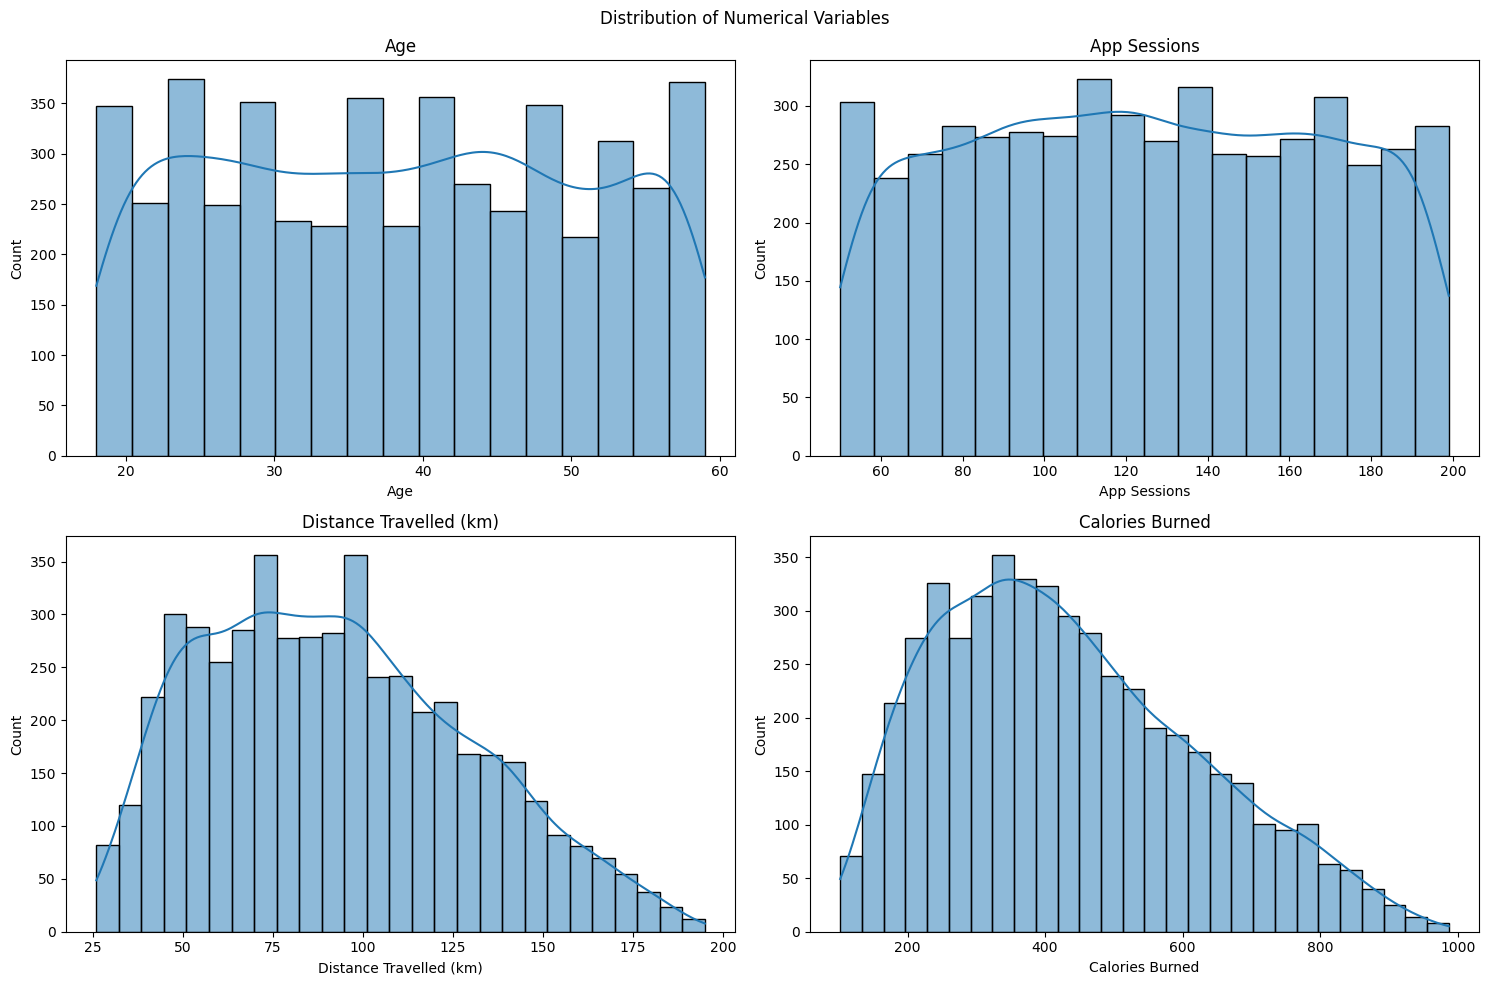

In [8]:
# Create histograms for numerical variables
numerical_cols = ['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Variables')

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(col)

plt.tight_layout()
plt.show()

In [9]:
# Create new features
df['Avg_Distance_Per_Session'] = df['Distance Travelled (km)'] / df['App Sessions']
df['Avg_Calories_Per_Session'] = df['Calories Burned'] / df['App Sessions']
# Display the first few rows with the new features
df.head()

,User ID,Gender,Age,Activity Level,Location,App Sessions,Distance Travelled (km),Calories Burned,Avg_Distance_Per_Session,Avg_Calories_Per_Session
0,1,Female,22,Active,Suburban,151,140,728,0.927152,4.821192
1,2,Male,50,Active,Rural,157,115,523,0.732484,3.331210
2,3,Male,36,Active,Urban,178,163,795,0.915730,4.466292
3,4,Female,36,Active,Suburban,155,85,715,0.548387,4.612903
4,5,Male,34,Sedentary,Rural,95,71,439,0.747368,4.621053


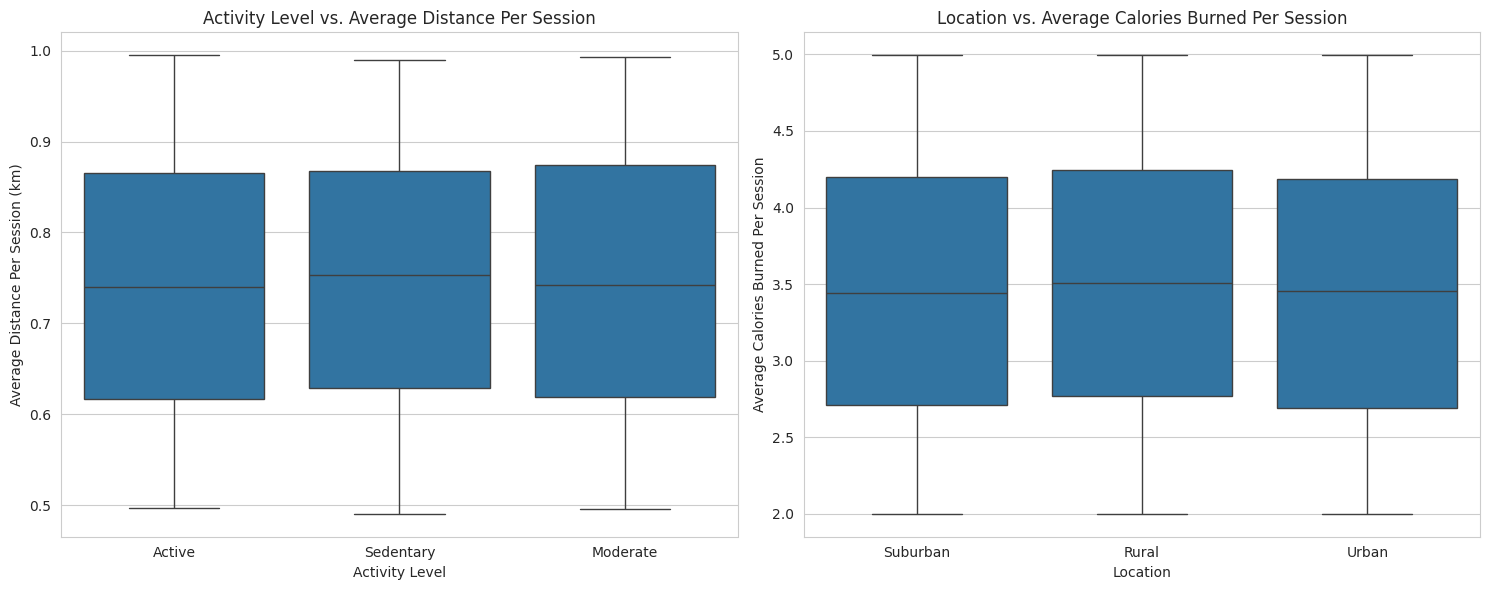

In [10]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))
# Plot the relationship between activity level and average distance per session
plt.subplot(1, 2, 1)
sns.boxplot(x='Activity Level', y='Avg_Distance_Per_Session', data=df)
plt.title('Activity Level vs. Average Distance Per Session')
plt.xlabel('Activity Level')
plt.ylabel('Average Distance Per Session (km)')

# Plot the relationship between location and average calories burned per session
plt.subplot(1, 2, 2)
sns.boxplot(x='Location', y='Avg_Calories_Per_Session', data=df)
plt.title('Location vs. Average Calories Burned Per Session')
plt.xlabel('Location')
plt.ylabel('Average Calories Burned Per Session')

plt.tight_layout()
plt.show()

<ipython-input-11-829ead10fc26>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


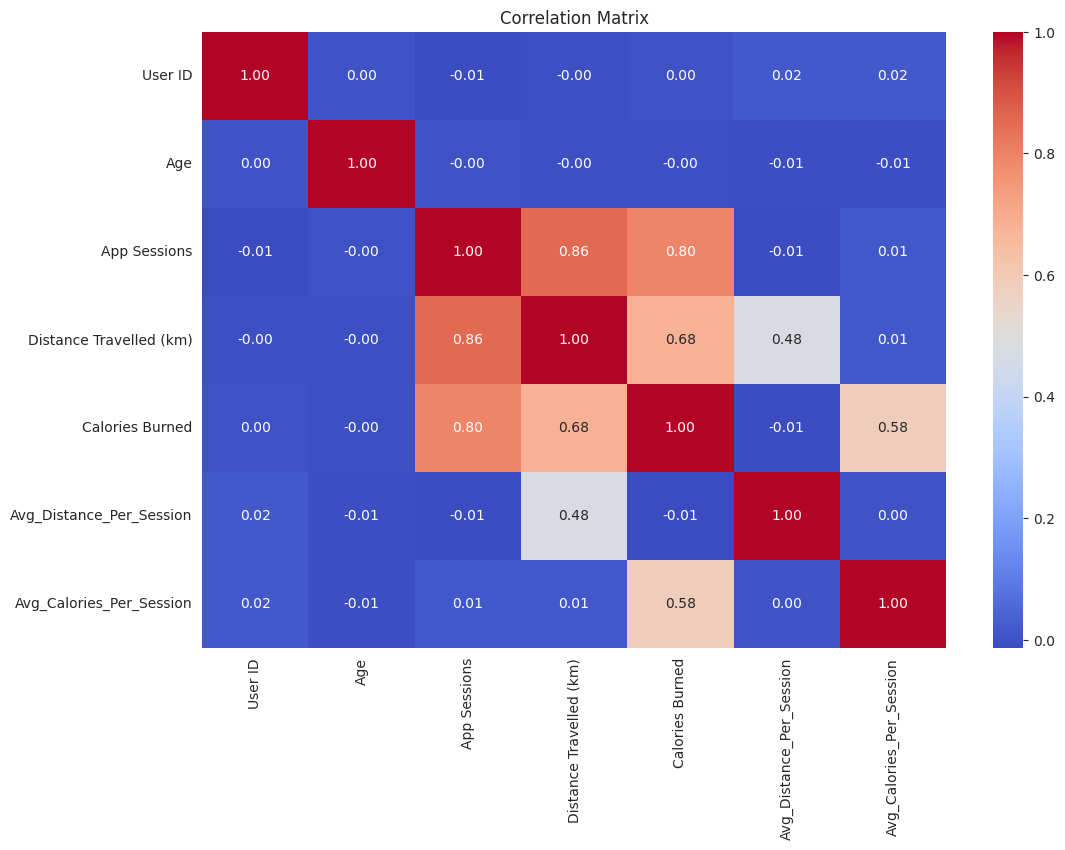

In [11]:
# Compute the correlation matrix
corr_matrix = df.corr()
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

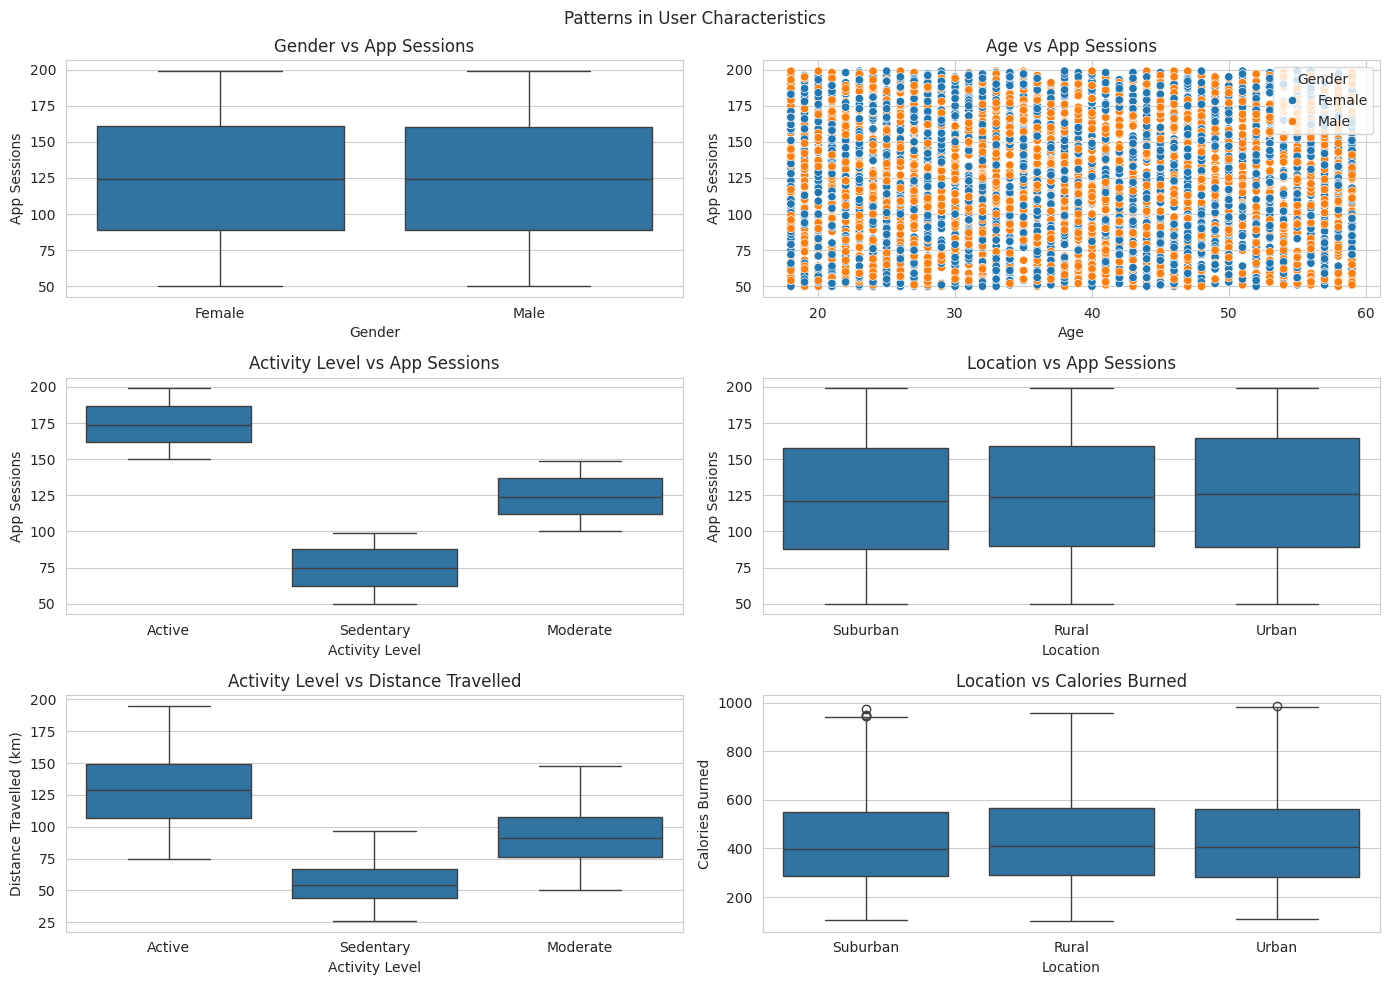

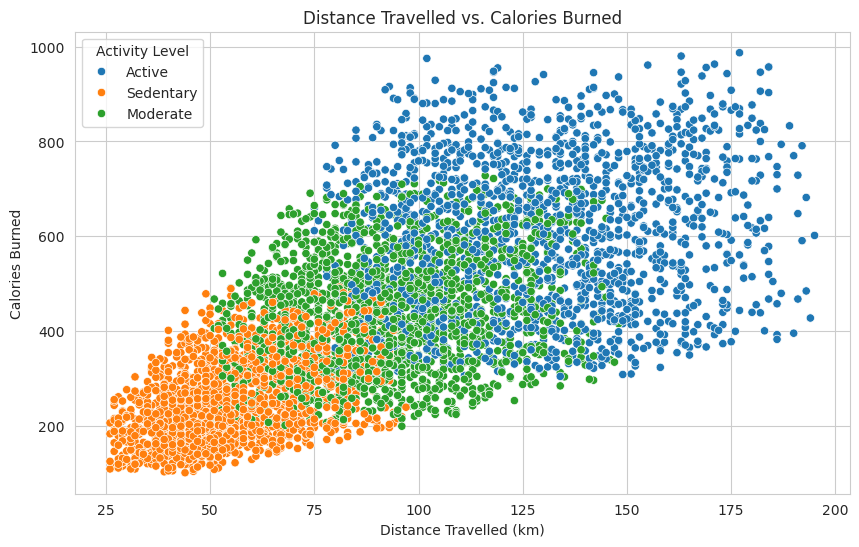

In [37]:
# Analyze patterns based on user characteristics
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
fig.suptitle('Patterns in User Characteristics')

# Gender vs App Sessions  # Analyzing user engagement by gender
sns.boxplot(x='Gender', y='App Sessions', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Gender vs App Sessions')

# Age vs App Sessions
sns.scatterplot(x='Age', y='App Sessions', hue='Gender', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Age vs App Sessions')


# Activity Level vs App Sessions
sns.boxplot(x='Activity Level', y='App Sessions', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Activity Level vs App Sessions')

# Location vs App Sessions
sns.boxplot(x='Location', y='App Sessions', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Location vs App Sessions')

# Activity Level vs Distance Travelled
sns.boxplot(x='Activity Level', y='Distance Travelled (km)', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Activity Level vs Distance Travelled')

# Location vs Calories Burned
sns.boxplot(x='Location', y='Calories Burned', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Location vs Calories Burned')

plt.tight_layout()
plt.show()


# Scatter plot to see the relationship between Distance Travelled and Calories Burned
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance Travelled (km)', y='Calories Burned', hue='Activity Level', data=df)

plt.title('Distance Travelled vs. Calories Burned')
plt.xlabel('Distance Travelled (km)')
plt.ylabel('Calories Burned')
plt.show()

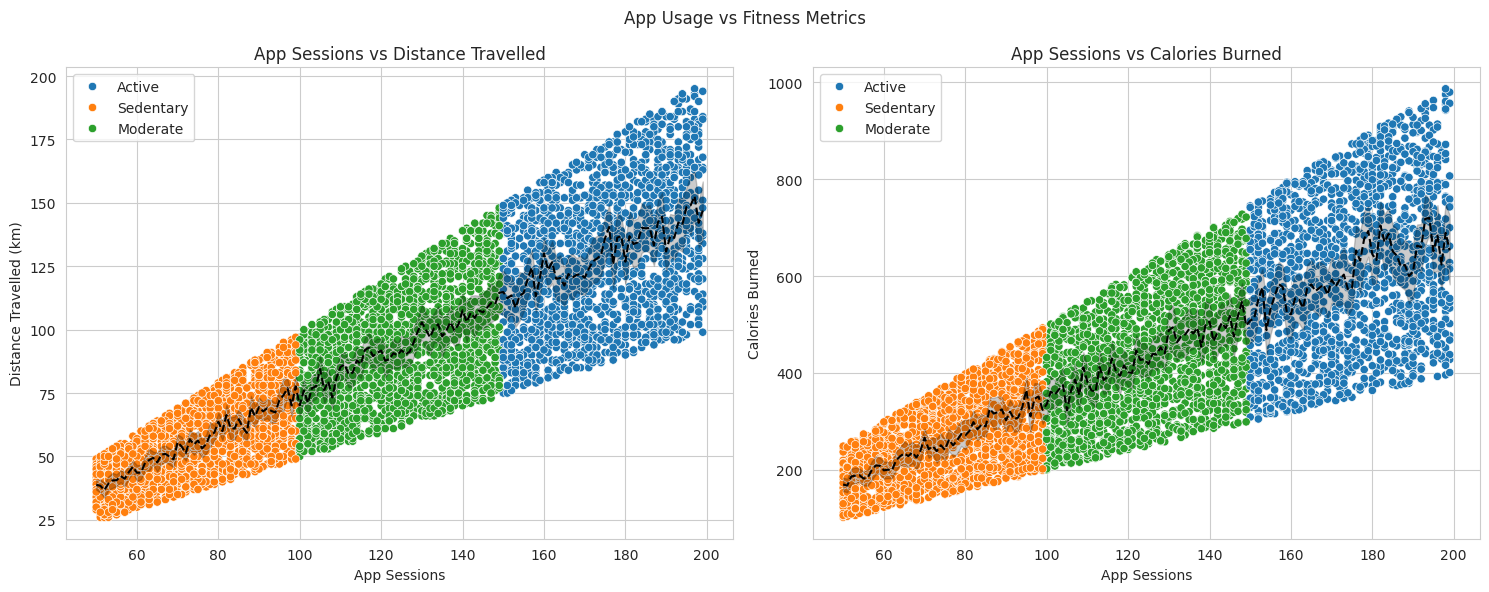

In [35]:
# Analyze relationships between app usage and fitness metrics
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('App Usage vs Fitness Metrics')

sns.scatterplot(x='App Sessions', y='Distance Travelled (km)', hue='Activity Level', data=df, ax=axes[0])
sns.lineplot(x='App Sessions', y='Distance Travelled (km)', data=df, color='black', linestyle='--', ax=axes[0])
axes[0].set_title('App Sessions vs Distance Travelled')

sns.scatterplot(x='App Sessions', y='Calories Burned', hue='Activity Level', data=df, ax=axes[1])
sns.lineplot(x='App Sessions', y='Calories Burned', data=df, color='black', linestyle='--', ax=axes[1])
axes[1].set_title('App Sessions vs Calories Burned')

plt.tight_layout()
plt.show()


In [15]:
# Define engagement levels based on app sessions
df['Engagement Level'] = pd.cut(df['App Sessions'], 
                                bins=[0, 50, 100, 150, float('inf')],
                                labels=['Low', 'Medium', 'High', 'Very High'])

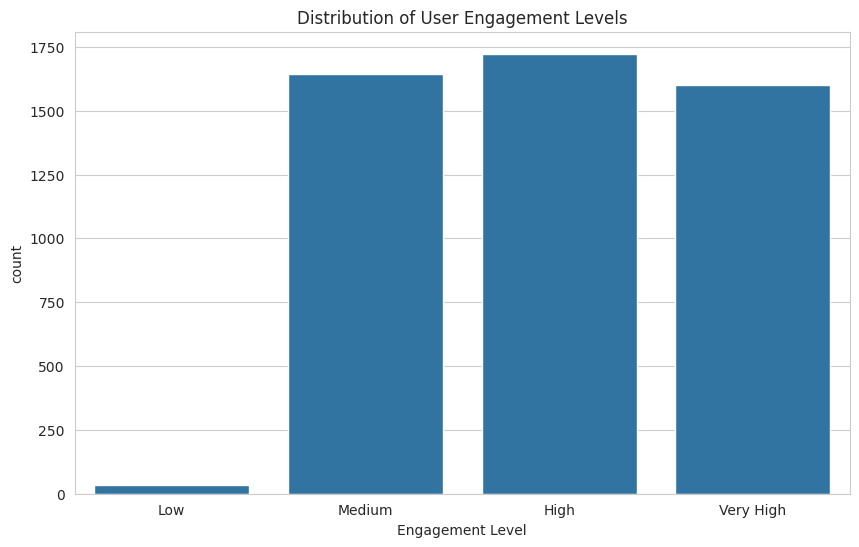

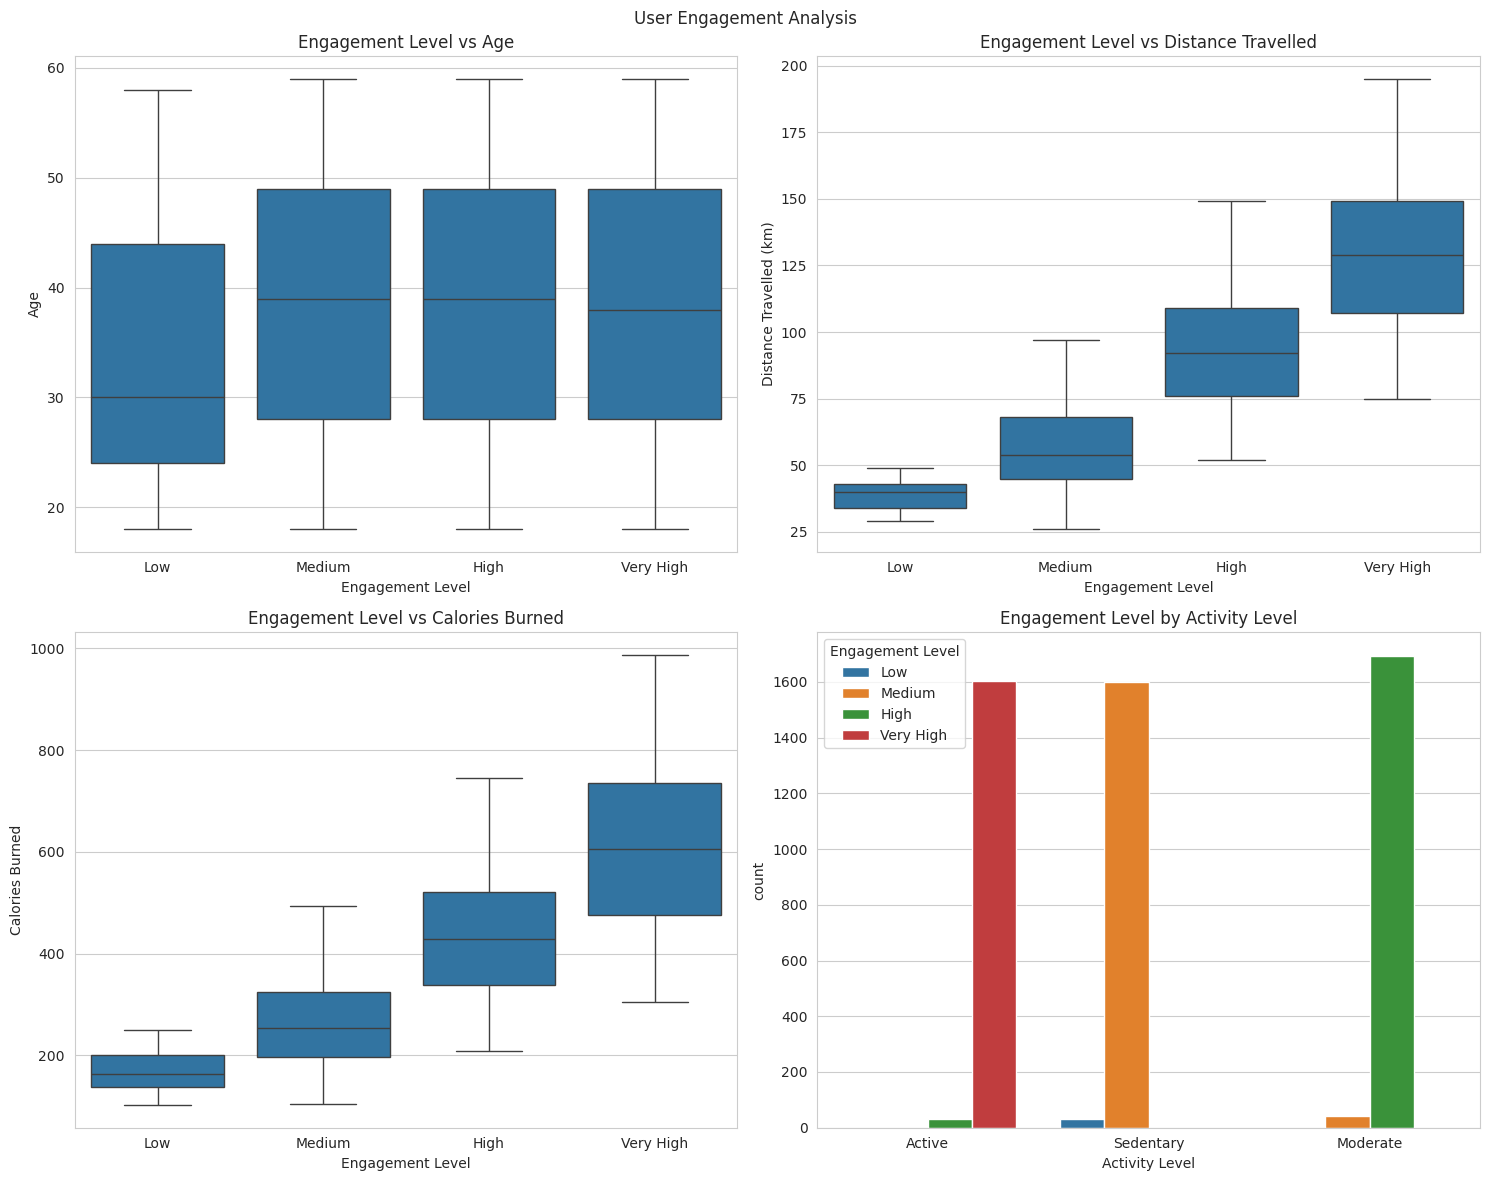

In [16]:
# Analyze engagement distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Engagement Level', data=df)
plt.title('Distribution of User Engagement Levels')
plt.show()

# Analyze engagement by user characteristics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('User Engagement Analysis')

sns.boxplot(x='Engagement Level', y='Age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Engagement Level vs Age')

sns.boxplot(x='Engagement Level', y='Distance Travelled (km)', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Engagement Level vs Distance Travelled')

sns.boxplot(x='Engagement Level', y='Calories Burned', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Engagement Level vs Calories Burned')

sns.countplot(x='Activity Level', hue='Engagement Level', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Engagement Level by Activity Level')
axes[1, 1].legend(title='Engagement Level')

plt.tight_layout()
plt.show()